<a href="https://colab.research.google.com/github/Baaprado/Pos_Tech_FIAP/blob/main/Fase_3_Tech_Challenge_FIAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Leitura inicial dos arquivos**

## **Instalações**

In [2]:
!pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=83d344b1d763f397cfedbd3c117c2f90adfbfda9758eea8f8af1ad2e45532f6c
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3


In [3]:
!pip install xlrd

## **Importação das bibliotecas e inicialização da SparkSession**

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
import re

spark = SparkSession.builder.appName("PNAD_COVID").getOrCreate()

## **Leitura da base com os questionamentos para um DataFrame do PySpark**

In [5]:
!wget "https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/072020.zip" -O "072020.zip"
!unzip -o "072020.zip" -d "072020"

caminho_arquivo_csv = "072020/PNAD_COVID_072020.csv"
microdados_072020 = spark.read.csv(caminho_arquivo_csv, header=True, inferSchema=True, sep=",")

--2024-12-17 11:25:09--  https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/072020.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/072020.zip [following]
--2024-12-17 11:25:09--  https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/072020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14242290 (14M) [application/zip]
Saving to: ‘072020.zip’

072020.zip          100%[===================>]  13.58M  27.5MB/s    in 0.5s    

2024-12-17 11:25:19 (27.5 MB/s) - ‘072020.zip’ saved [14242290/14242290]

Archive:  072020.zip
  inflating: 072020/Dicionario_PNA

In [6]:
!wget "https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/092020.zip" -O "092020.zip"
!unzip -o "092020.zip" -d "092020"

caminho_arquivo_csv = "092020/PNAD_COVID_092020.csv"
microdados_092020 = spark.read.csv(caminho_arquivo_csv, header=True, inferSchema=True, sep=",")

--2024-12-17 11:25:45--  https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/092020.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/092020.zip [following]
--2024-12-17 11:25:45--  https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/092020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15777969 (15M) [application/zip]
Saving to: ‘092020.zip’

092020.zip          100%[===================>]  15.05M  32.3MB/s    in 0.5s    

2024-12-17 11:25:47 (32.3 MB/s) - ‘092020.zip’ saved [15777969/15777969]

Archive:  092020.zip
  inflating: 092020/Dicionario_PNA

In [7]:
!wget "https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/112020.zip" -O "112020.zip"
!unzip -o "112020.zip" -d "112020"

caminho_arquivo_csv = "112020/PNAD_COVID_112020.csv"
microdados_112020 = spark.read.csv(caminho_arquivo_csv, header=True, inferSchema=True, sep=",")

--2024-12-17 11:26:04--  https://github.com/Baaprado/Pos_Tech_FIAP/raw/main/112020.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/112020.zip [following]
--2024-12-17 11:26:04--  https://raw.githubusercontent.com/Baaprado/Pos_Tech_FIAP/main/112020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16693899 (16M) [application/zip]
Saving to: ‘112020.zip’

112020.zip          100%[===================>]  15.92M  37.3MB/s    in 0.4s    

2024-12-17 11:26:30 (37.3 MB/s) - ‘112020.zip’ saved [16693899/16693899]

Archive:  112020.zip
  inflating: 112020/Dicionario_PNA

In [8]:
microdados_072020.show()

+----+---+-------+-------+-----+-----+-----+-----+-------+---------+-----+-----+------+------------+------------+------+----+-----+------+------+------+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+-----+-----+-----+----+----+-----+-----+-----+-----+-----+------+------+-----+----+----+-----+----+-----+------+------+-----+------+------+-----+-----+-----+------+-------+-------+------+-------+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+----+-----+-----+------+------+------+------+------+-----+----+
| Ano| UF|CAPITAL|RM_RIDE|V1008|V1012|V1013|V1016|Estrato|      UPA|V1022|V1023| V1030|       V1031|       V10

## **Seleção das questões a serem analisadas e união dos DataFrames referentes a 3 meses**

In [9]:
selected_columns = ['UF','V1013','A002','A003','A004','A005','C007D','C01011','C013','C016','D0051','B0011','B0012','B0014','B0016','B00111','B002','B005','B007','B011']

df_pnad_202007_selected = microdados_072020.select(selected_columns)
df_pnad_202009_selected = microdados_092020.select(selected_columns)
df_pnad_202011_selected = microdados_112020.select(selected_columns)
df_final = df_pnad_202007_selected.union(df_pnad_202009_selected).union(df_pnad_202011_selected)

df_final.show()

+---+-----+----+----+----+----+-----+------+----+----+-----+-----+-----+-----+-----+------+----+----+----+----+
| UF|V1013|A002|A003|A004|A005|C007D|C01011|C013|C016|D0051|B0011|B0012|B0014|B0016|B00111|B002|B005|B007|B011|
+---+-----+----+----+----+----+-----+------+----+----+-----+-----+-----+-----+-----+------+----+----+----+----+
| 11|    7|  35|   1|   4|   5|    6|     4|null|null|    1|    2|    2|    2|    2|     2|null|null|   1|   2|
| 11|    7|  29|   2|   4|   7| null|  null|null|  10|    1|    2|    2|    2|    2|     2|null|null|   2|   3|
| 11|    7|  13|   1|   4|   2| null|  null|null|null|    1|    2|    2|    2|    2|     2|null|null|   1|   4|
| 11|    7|  10|   1|   4|   2| null|  null|null|null|    1|    2|    2|    2|    2|     2|null|null|   1|   4|
| 11|    7|  57|   2|   1|   2| null|  null|null|   1|    2|    2|    2|    2|    2|     2|null|null|   2|   3|
| 11|    7|  47|   1|   4|   2|    5|     5|null|null|    1|    2|    2|    2|    2|     2|null|null|   

## **Tratamento do DataFrame de acordo com o dicionário**

In [10]:
UF = {
    11: "Rondônia",12: "Acre",13: "Amazonas",14: "Roraima",15: "Pará",16: "Amapá",
    17: "Tocantins",21: "Maranhão",22: "Piauí",23: "Ceará",24: "Rio Grande do Norte",
    25: "Paraíba",26: "Pernambuco",27: "Alagoas",28: "Sergipe",29: "Bahia",31: "Minas Gerais",
    32: "Espírito Santo",33: "Rio de Janeiro",35: "São Paulo",41: "Paraná",42: "Santa Catarina",
    43: "Rio Grande do Sul",50: "Mato Grosso do Sul",51: "Mato Grosso",52: "Goiás",53: "Distrito Federal"}

A003 ={1:'Homem',2:'Mulher'}
A004 ={1:'Branca',2:'Preta',3:'Amarela',4:'Parda',5:'Indígena',9:'Não informado'}
A005 = {1: "Sem instrução",2: "Fundamental incompleto",3: "Fundamental completo",4: "Médio incompleto",5: "Médio completo",6: "Superior incompleto",7: "Superior completo",8:"Pós Graduação, Mestrado ou Doutorado"}
C007D = {
            1: "Agricultura, pecuária, produção florestal e pesca",
            2: "Extração de petróleo, carvão mineral, minerais metálicos, pedra, areia, sal etc.",
            3: "Indústria da transformação (inclusive confecção e fabricação caseira)",
            4: "Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo",
            5: "Construção",
            6: "Comércio no atacado e varejo",
            7: "Reparação de veículos automotores e motocicletas",
            8: "Transporte de passageiros",
            9: "Transporte de mercadorias",
            10: "Armazenamento, correios e serviços de entregas",
            11: "Hospedagem (hotéis, pousadas etc.)",
            12: "Serviço de alimentação (bares, restaurantes, ambulantes de alimentação)",
            13: "Informação e comunicação (jornais, rádio e televisão, telecomunicações e informática)",
            14: "Bancos, atividades financeiras e de seguros",
            15: "Atividades imobiliárias",
            16: "Escritórios de advocacia, engenharia, publicidade e veterinária (Atividades profissionais, científicas e técnicas)",
            17: "Atividades de locação de mão de obra, segurança, limpeza, paisagismo e teleatendimento",
            18: "Administração pública (governo federal, estadual e municipal)",
            19: "Educação",
            20: "Saúde humana e assistência social",
            21: "Organizações religiosas, sindicatos e associações",
            22: "Atividades artísticas, esportivas e de recreação",
            23: "Cabeleireiros, tratamento de beleza e serviços pessoais",
            24: "Serviço doméstico remunerado (será imputado da posição na ocupação)",
            25: "Outro"
        }
C01011 = {
    0: "0 - 100",
    1: "101 - 300",
    2: "301 - 600",
    3: "601 - 800",
    4: "801 - 1.600",
    5: "1.601 - 3.000",
    6: "3.001 - 10.000",
    7: "10.001 - 50.000",
    8: "50.001 - 100.000",
    9: "Mais de 100.000"
}

C013 = {1: "Sim",2: "Não"}

C016 = {
        1: "Devido à pandemia (isolamento, quarentena ou distanciamento social)",
        2: "Por problemas de saúde ou gravidez",
        4: "Não quer trabalhar ou é aposentado",
        5: "Não tinha experiência profissional ou qualificação",
        6: "Acha que não vai encontrar trabalho por ser muito jovem ou idoso",
        7: "Não havia trabalho na localidade",
        8: "Tinha que cuidar dos afazeres domésticos e/ou de parentes",
        9: "Estava aguardando resposta de medida tomada para conseguir trabalho",
        10: "Outro motivo"
       }

D0051 = {1: "Sim",2: "Não"}
B0011 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B0012 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B0014 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B0016 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B00111 = {1: "Sim",2: "Não",3: "Não sei",9: "Ignorado"}
B002 = {1: "Sim",2: "Não",9: "Ignorado"}
B005 = {1: "Sim",2: "Não",9: "Ignorado"}
B007 = {1: "Sim",2: "Não",9: "Ignorado"}
B011 = {
        1: "Não fez restrição, levou vida normal como antes da pandemia",
        2: "Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas",
        3: "Ficou em casa e só saiu em caso de necessidade básica",
        4: "Ficou rigorosamente em casa",
        9: "Ignorado"
        }

In [12]:
from itertools import chain

NME_COLUNA =['UF','NUM_MES_PESQUISA','NUM_IDADE_MORADOR','DSC_SEXO','DSC_COR_RACA','DSC_NIVEL_INSTRUCAO','DSC_AREA_ATUACAO','DSC_FAIXA_RECEBIDO','DSC_TELETRABALHO','DSC_MOTIVO_N_PROCUROU_TRABALHO','DSC_AUXILIO_CORONAVIRUS','DSC_FEBRE','DSC_TOSSE','DSC_DIFICULDADE_RESPIRATORIA','DSC_DOR_PEITO','DSC_PERDA_OLFATO_PALADAR','DSC_FOI_ESTABELECIMENTO_SAUDE','DSC_FOI_INTERNADO','DSC_PLANO_SAUDE','DSC_CONTATO_COM_OUTRAS_PESSOAS']

col_dict = {
    'UF': UF,
    'A003': A003,
    'A004': A004,
    'A005': A005,
    'C007D': C007D,
    'C01011':C01011,
    'C013':C013,
    'C016':C016,
    'D0051':D0051,
    'B0011':B0011,
    'B0012':B0012,
    'B0014':B0014,
    'B0016':B0016,
    'B00111':B00111,
    'B002':B002,
    'B005':B005,
    'B007':B007,
    'B011':B011
}

for col, lookup in col_dict.items():
    mapping_expr = when(df_final[col].isin(list(lookup.keys())),
                      create_map([lit(x) for x in chain(*lookup.items())])[df_final[col]]) \
                   .otherwise(df_final[col])

    df_final= df_final.withColumn(col, mapping_expr)

df_final= df_final.toDF(*NME_COLUNA)

df_final= df_final.na.fill('Não aplicável')

## **Visualização do DataFrame**

In [13]:
df_final.show()

+--------+----------------+-----------------+--------+------------+--------------------+--------------------+------------------+----------------+------------------------------+-----------------------+---------+---------+----------------------------+-------------+------------------------+-----------------------------+-----------------+---------------+------------------------------+
|      UF|NUM_MES_PESQUISA|NUM_IDADE_MORADOR|DSC_SEXO|DSC_COR_RACA| DSC_NIVEL_INSTRUCAO|    DSC_AREA_ATUACAO|DSC_FAIXA_RECEBIDO|DSC_TELETRABALHO|DSC_MOTIVO_N_PROCUROU_TRABALHO|DSC_AUXILIO_CORONAVIRUS|DSC_FEBRE|DSC_TOSSE|DSC_DIFICULDADE_RESPIRATORIA|DSC_DOR_PEITO|DSC_PERDA_OLFATO_PALADAR|DSC_FOI_ESTABELECIMENTO_SAUDE|DSC_FOI_INTERNADO|DSC_PLANO_SAUDE|DSC_CONTATO_COM_OUTRAS_PESSOAS|
+--------+----------------+-----------------+--------+------------+--------------------+--------------------+------------------+----------------+------------------------------+-----------------------+---------+---------+------------

# **Exploração dos dados**

## **Exploração inicial**

In [15]:
df_final.createOrReplaceTempView("tabela_microdados")

**Distribuição de sexo**

In [16]:
spark.sql("""
SELECT
 DSC_SEXO,
 COUNT(*) AS TOTAL,
 ROUND((COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()), 2) AS PERCENTUAL
FROM tabela_microdados
GROUP BY DSC_SEXO
ORDER BY TOTAL DESC
""").show()

+--------+------+----------+
|DSC_SEXO| TOTAL|PERCENTUAL|
+--------+------+----------+
|  Mulher|600115|     52.05|
|   Homem|552787|     47.95|
+--------+------+----------+



**Distribuição de cor/raça**

In [17]:
spark.sql("""
SELECT
 DSC_COR_RACA,
 COUNT(*) AS TOTAL,
 ROUND((COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()), 2) AS PERCENTUAL
FROM tabela_microdados
GROUP BY DSC_COR_RACA
ORDER BY TOTAL DESC
""").show()

+-------------+------+----------+
| DSC_COR_RACA| TOTAL|PERCENTUAL|
+-------------+------+----------+
|        Parda|565448|     49.05|
|       Branca|481264|     41.74|
|        Preta| 94542|      8.20|
|      Amarela|  6920|      0.60|
|     Indígena|  4445|      0.39|
|Não informado|   283|      0.02|
+-------------+------+----------+



**Distribuição de nível de instrução**

In [18]:
spark.sql("""
SELECT
 DSC_NIVEL_INSTRUCAO,
 COUNT(*) AS TOTAL
FROM tabela_microdados
GROUP BY DSC_NIVEL_INSTRUCAO
ORDER BY TOTAL DESC
""").show()

+--------------------+------+
| DSC_NIVEL_INSTRUCAO| TOTAL|
+--------------------+------+
|Fundamental incom...|389050|
|      Médio completo|257051|
|       Sem instrução|124279|
|    Médio incompleto|108080|
|   Superior completo|108019|
|Fundamental completo| 76365|
| Superior incompleto| 59914|
|Pós Graduação, Me...| 30144|
+--------------------+------+



**Estatísticas descritivas da idade**

In [33]:
spark.sql("""
SELECT
 MIN(NUM_IDADE_MORADOR) AS IDADE_MIN,
 MAX(NUM_IDADE_MORADOR) AS IDADE_MAX,
 CAST(AVG(NUM_IDADE_MORADOR) AS INT) AS IDADE_MEDIA,
 CAST(PERCENTILE(NUM_IDADE_MORADOR, 0.5) AS INT) AS IDADE_MEDIANA
FROM tabela_microdados
""").show()

+---------+---------+-----------+-------------+
|IDADE_MIN|IDADE_MAX|IDADE_MEDIA|IDADE_MEDIANA|
+---------+---------+-----------+-------------+
|        0|      111|         36|           36|
+---------+---------+-----------+-------------+



**Incidência de sintomas (febre) por faixa etária**

In [20]:
spark.sql("""
SELECT
 CASE
   WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
   WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
   WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
 ELSE '60+'
 END AS FAIXA_ETARIA,
 COUNT(*) AS TOTAL_FEBRE
FROM tabela_microdados
WHERE DSC_FEBRE = 'Sim'
GROUP BY FAIXA_ETARIA
ORDER BY FAIXA_ETARIA
""").show()

+------------+-----------+
|FAIXA_ETARIA|TOTAL_FEBRE|
+------------+-----------+
|        0-17|       2551|
|       18-35|       3470|
|       36-60|       4601|
|         60+|       1462|
+------------+-----------+



**Relação entre nível de instrução, faixa de rendimento e gênero**

In [21]:
spark.sql("""
SELECT
 DSC_NIVEL_INSTRUCAO,
 DSC_SEXO,
 DSC_FAIXA_RECEBIDO,
 COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_FAIXA_RECEBIDO IS NOT NULL
GROUP BY DSC_NIVEL_INSTRUCAO, DSC_SEXO, DSC_FAIXA_RECEBIDO
ORDER BY DSC_NIVEL_INSTRUCAO, DSC_FAIXA_RECEBIDO
""").show()

+--------------------+--------+------------------+-----+
| DSC_NIVEL_INSTRUCAO|DSC_SEXO|DSC_FAIXA_RECEBIDO|TOTAL|
+--------------------+--------+------------------+-----+
|Fundamental completo|  Mulher|           0 - 100|  123|
|Fundamental completo|   Homem|           0 - 100|   99|
|Fundamental completo|  Mulher|     1.601 - 3.000| 1404|
|Fundamental completo|   Homem|     1.601 - 3.000| 5924|
|Fundamental completo|   Homem|   10.001 - 50.000|   76|
|Fundamental completo|  Mulher|   10.001 - 50.000|   16|
|Fundamental completo|  Mulher|         101 - 300|  579|
|Fundamental completo|   Homem|         101 - 300|  501|
|Fundamental completo|   Homem|    3.001 - 10.000| 1417|
|Fundamental completo|  Mulher|    3.001 - 10.000|  304|
|Fundamental completo|  Mulher|         301 - 600| 1163|
|Fundamental completo|   Homem|         301 - 600| 1319|
|Fundamental completo|  Mulher|         601 - 800|  677|
|Fundamental completo|   Homem|         601 - 800|  907|
|Fundamental completo|   Homem|

**Distribuição de faixa de renda por área de atuação**

In [22]:
spark.sql("""
SELECT
 DSC_AREA_ATUACAO,
 DSC_FAIXA_RECEBIDO,
 COUNT(*) AS TOTAL
FROM tabela_microdados
WHERE DSC_AREA_ATUACAO IS NOT NULL
GROUP BY DSC_AREA_ATUACAO, DSC_FAIXA_RECEBIDO
ORDER BY TOTAL DESC
""").show()

+--------------------+------------------+------+
|    DSC_AREA_ATUACAO|DSC_FAIXA_RECEBIDO| TOTAL|
+--------------------+------------------+------+
|       Não aplicável|     Não aplicável|718741|
|Comércio no ataca...|       801 - 1.600| 30482|
|Agricultura, pecu...|       801 - 1.600| 22231|
|Indústria da tran...|       801 - 1.600| 16951|
|          Construção|       801 - 1.600| 14250|
|Comércio no ataca...|     1.601 - 3.000| 12620|
|Saúde humana e as...|       801 - 1.600| 12205|
|               Outro|       801 - 1.600| 11802|
|Serviço doméstico...|       801 - 1.600| 11309|
|            Educação|       801 - 1.600| 11072|
|Serviço de alimen...|       801 - 1.600| 10040|
|Indústria da tran...|     1.601 - 3.000| 10004|
|            Educação|     1.601 - 3.000|  9975|
|Administração púb...|       801 - 1.600|  9093|
|Agricultura, pecu...|     Não aplicável|  8958|
|            Educação|    3.001 - 10.000|  8894|
|Agricultura, pecu...|     1.601 - 3.000|  8692|
|Saúde humana e as..

**Relação entre sintomas, faixa etária e acesso a hospitais**

In [23]:
spark.sql("""
SELECT
 CASE
   WHEN NUM_IDADE_MORADOR BETWEEN 0 AND 17 THEN '0-17'
   WHEN NUM_IDADE_MORADOR BETWEEN 18 AND 35 THEN '18-35'
   WHEN NUM_IDADE_MORADOR BETWEEN 36 AND 60 THEN '36-60'
 ELSE '60+'
 END AS FAIXA_ETARIA,
 COUNT(*) AS TOTAL_SINTOMAS,
 SUM(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 ELSE 0 END) AS PROCUROU_SAUDE
FROM tabela_microdados
WHERE DSC_FEBRE = 'Sim' OR DSC_TOSSE = 'Sim' OR DSC_DOR_PEITO = 'Sim'
GROUP BY FAIXA_ETARIA
ORDER BY FAIXA_ETARIA
""").show()

+------------+--------------+--------------+
|FAIXA_ETARIA|TOTAL_SINTOMAS|PROCUROU_SAUDE|
+------------+--------------+--------------+
|        0-17|          4784|          1532|
|       18-35|          6696|          2703|
|       36-60|          9924|          3833|
|         60+|          4742|          1536|
+------------+--------------+--------------+



**Análise entre teletrabalho, faixa de renda e sintomas**

In [24]:
spark.sql("""
SELECT
 DSC_FAIXA_RECEBIDO,
 DSC_TELETRABALHO,
 COUNT(*) AS TOTAL,
 SUM(CASE WHEN DSC_FEBRE = 'Sim' OR DSC_TOSSE = 'Sim' THEN 1 ELSE 0 END) AS TOTAL_SINTOMAS
FROM tabela_microdados
GROUP BY DSC_FAIXA_RECEBIDO, DSC_TELETRABALHO
ORDER BY DSC_FAIXA_RECEBIDO
""").show()

+------------------+----------------+-----+--------------+
|DSC_FAIXA_RECEBIDO|DSC_TELETRABALHO|TOTAL|TOTAL_SINTOMAS|
+------------------+----------------+-----+--------------+
|           0 - 100|             Não|  177|            12|
|           0 - 100|             Sim|   20|             2|
|           0 - 100|   Não aplicável| 2788|            73|
|     1.601 - 3.000|   Não aplicável|89012|          1991|
|     1.601 - 3.000|             Sim|10558|           229|
|     1.601 - 3.000|             Não| 3200|            65|
|   10.001 - 50.000|   Não aplicável| 4976|           129|
|   10.001 - 50.000|             Não|  101|             3|
|   10.001 - 50.000|             Sim| 2748|            63|
|         101 - 300|   Não aplicável|13266|           381|
|         101 - 300|             Sim|  104|             4|
|         101 - 300|             Não|  921|            12|
|    3.001 - 10.000|   Não aplicável|42891|           941|
|    3.001 - 10.000|             Não| 1228|            3

## **Análise avançada**

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [37]:
spark.sql("""
SELECT NUM_MES_PESQUISA, COUNT(*) AS QTDE_REGISTROS
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA;
""").show()

+----------------+--------------+
|NUM_MES_PESQUISA|QTDE_REGISTROS|
+----------------+--------------+
|               7|        384166|
|               9|        387298|
|              11|        381438|
+----------------+--------------+



### Comportamento Clínico
Insights a serem explorados:

- Sintomas mais prevalentes ao longo dos meses e sua distribuição por UF.
- Correlação entre sintomas graves (ex: dificuldade respiratória) e hospitalizações.
- Comparar sintomas por faixa etária e sexo, identificando grupos de risco.

**Sintomas mais prevalentes ao longo dos meses e por UF**

In [34]:
spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    UF,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' THEN 1 END) AS dificuldade_respiratoria,
    COUNT(CASE WHEN DSC_PERDA_OLFATO_PALADAR = 'Sim' THEN 1 END) AS perda_olfato_paladar
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, UF
ORDER BY NUM_MES_PESQUISA, UF;
""").show()

+----+-----------------+-----+-----+------------------------+
|  UF|NUM_IDADE_MORADOR|FEBRE|TOSSE|DIFICULDADE_RESPIRATORIA|
+----+-----------------+-----+-----+------------------------+
|Acre|                0|    4|    4|                       4|
|Acre|                1|    2|    2|                       2|
|Acre|                2|    4|    4|                       4|
|Acre|                3|    5|    5|                       5|
|Acre|                4|    8|    8|                       8|
|Acre|                5|    5|    5|                       5|
|Acre|                6|    5|    5|                       5|
|Acre|                7|    2|    2|                       2|
|Acre|                8|    4|    4|                       4|
|Acre|                9|    5|    5|                       5|
|Acre|               10|    3|    3|                       3|
|Acre|               11|    8|    8|                       8|
|Acre|               12|    5|    5|                       5|
|Acre|  

In [39]:
sintomas_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    UF,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' THEN 1 END) AS dificuldade_respiratoria,
    COUNT(CASE WHEN DSC_PERDA_OLFATO_PALADAR = 'Sim' THEN 1 END) AS perda_olfato_paladar
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA, UF
ORDER BY NUM_MES_PESQUISA, UF;
""").toPandas()

fig = px.bar(sintomas_df, x="UF", y=["febre", "tosse", "dificuldade_respiratoria", "perda_olfato_paladar"],
             color="NUM_MES_PESQUISA", barmode="group", title="Sintomas por UF e Mês")
fig.show()

**Correlação entre sintomas graves e hospitalizações**

In [40]:
spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) AS internacoes_graves,
    COUNT(*) AS total_casos,
    ROUND((COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_internacao
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA;
""").show()

+----------------+------------------+-----------+---------------+
|NUM_MES_PESQUISA|internacoes_graves|total_casos|taxa_internacao|
+----------------+------------------+-----------+---------------+
|               7|               151|     384166|           0.04|
|               9|               102|     387298|           0.03|
|              11|               101|     381438|           0.03|
+----------------+------------------+-----------+---------------+



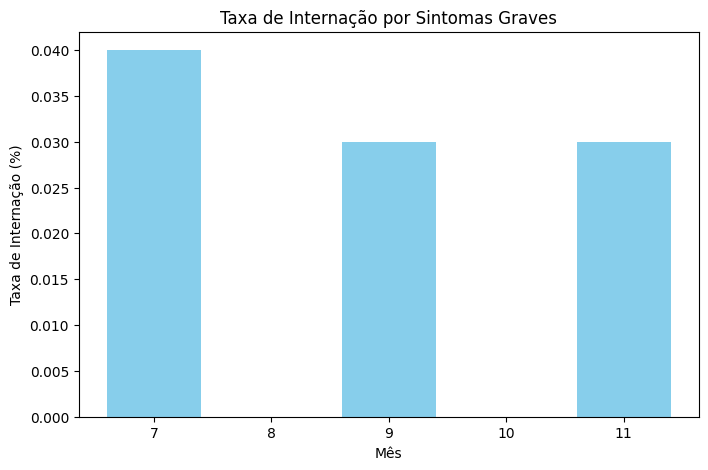

In [41]:
internacoes_df = spark.sql("""
SELECT
    NUM_MES_PESQUISA,
    COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) AS internacoes_graves,
    COUNT(*) AS total_casos,
    ROUND((COUNT(CASE WHEN DSC_DIFICULDADE_RESPIRATORIA = 'Sim' AND DSC_FOI_INTERNADO = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_internacao
FROM tabela_microdados
GROUP BY NUM_MES_PESQUISA
ORDER BY NUM_MES_PESQUISA;
""").toPandas()

plt.figure(figsize=(8, 5))
plt.bar(internacoes_df['NUM_MES_PESQUISA'], internacoes_df['taxa_internacao'], color='skyblue')
plt.title("Taxa de Internação por Sintomas Graves")
plt.xlabel("Mês")
plt.ylabel("Taxa de Internação (%)")
plt.show()

**Comparar sintomas por faixa etária e sexo**

In [42]:
spark.sql("""
SELECT
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre
FROM tabela_microdados
GROUP BY NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY NUM_IDADE_MORADOR, DSC_SEXO;
""").show()

+-----------------+--------+-----+-----+
|NUM_IDADE_MORADOR|DSC_SEXO|tosse|febre|
+-----------------+--------+-----+-----+
|                0|   Homem|   46|   59|
|                0|  Mulher|   58|   75|
|                1|   Homem|  107|  122|
|                1|  Mulher|   93|  120|
|                2|   Homem|   90|   75|
|                2|  Mulher|   91|   74|
|                3|   Homem|   94|   77|
|                3|  Mulher|   88|   77|
|                4|   Homem|  101|   74|
|                4|  Mulher|   91|   69|
|                5|   Homem|   81|   68|
|                5|  Mulher|   86|   67|
|                6|   Homem|  104|   64|
|                6|  Mulher|   90|   59|
|                7|   Homem|   83|   51|
|                7|  Mulher|   78|   56|
|                8|   Homem|  110|   63|
|                8|  Mulher|   85|   66|
|                9|   Homem|   79|   61|
|                9|  Mulher|   85|   52|
+-----------------+--------+-----+-----+
only showing top

In [43]:
sintomas_idade_df = spark.sql("""
SELECT
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(CASE WHEN DSC_TOSSE = 'Sim' THEN 1 END) AS tosse,
    COUNT(CASE WHEN DSC_FEBRE = 'Sim' THEN 1 END) AS febre
FROM tabela_microdados
GROUP BY NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY NUM_IDADE_MORADOR, DSC_SEXO;
""").toPandas()

fig = px.line(sintomas_idade_df, x="NUM_IDADE_MORADOR", y=["tosse", "febre"],
              color="DSC_SEXO", title="Sintomas por Idade e Sexo")
fig.show()

### Comportamento da População

Insights a serem explorados:

- Análise do trabalho presencial (DSC_TELETRABALHO) por idade, sexo e UF:
- Identificar quais grupos precisaram sair mais de casa.
- Analisar a busca por atendimento médico (DSC_FOI_ESTABELECIMENTO_SAUDE):
- Avaliar regiões com menor acesso ao atendimento e correlação com infraestrutura (UF).
- Contatos com outras pessoas:
- Analisar comportamento da população em relação ao isolamento (DSC_CONTATO_COM_OUTRAS_PESSOAS).

**Trabalho presencial por idade, sexo e UF**

In [44]:
spark.sql("""
SELECT
    UF,
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(*) AS quantidade_trabalhadores
FROM tabela_microdados
WHERE DSC_TELETRABALHO = 'Não'
GROUP BY UF, NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY quantidade_trabalhadores DESC;
""").show()

+--------------+-----------------+--------+------------------------+
|            UF|NUM_IDADE_MORADOR|DSC_SEXO|quantidade_trabalhadores|
+--------------+-----------------+--------+------------------------+
|      Maranhão|               38|   Homem|                      49|
|      Maranhão|               39|   Homem|                      40|
|      Maranhão|               31|   Homem|                      39|
|  Minas Gerais|               48|   Homem|                      38|
|      Maranhão|               37|   Homem|                      36|
|    Pernambuco|               42|   Homem|                      36|
|      Maranhão|               32|   Homem|                      35|
|      Maranhão|               23|   Homem|                      33|
|      Maranhão|               33|   Homem|                      33|
|  Minas Gerais|               41|   Homem|                      32|
|  Minas Gerais|               46|   Homem|                      32|
|  Minas Gerais|               37|

In [55]:
trabalho_df = spark.sql("""
SELECT
    UF,
    NUM_IDADE_MORADOR,
    DSC_SEXO,
    COUNT(*) AS quantidade_trabalhadores
FROM tabela_microdados
WHERE DSC_TELETRABALHO = 'Não'
GROUP BY UF, NUM_IDADE_MORADOR, DSC_SEXO
ORDER BY quantidade_trabalhadores DESC;
""").toPandas()

trabalho_df['FAIXA_ETARIA'] = pd.cut(trabalho_df['NUM_IDADE_MORADOR'], bins=[0, 17, 35, 60, 100], labels=['0-17', '18-35', '36-60', '60+'])

fig = px.bar(trabalho_df, x="UF", y="quantidade_trabalhadores", color="DSC_SEXO",
             facet_col="FAIXA_ETARIA", title="Trabalho Presencial por UF, Sexo e Faixa Etária")

fig.update_layout(
    xaxis={'tickangle': 90},
    yaxis_title="Quantidade de Trabalhadores",
    legend_title="Sexo",
    barmode='stack'
)

for annotation in fig['layout']['annotations']:
    if annotation['text'].startswith('FAIXA_ETARIA='):
        annotation['text'] = annotation['text'].split("=")[-1]

fig.update_layout(margin=dict(l=50, r=50, t=80, b=50))

fig.show()

**Busca por atendimento médico por UF**

In [49]:
spark.sql("""
SELECT
    UF,
    COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) AS buscaram_atendimento,
    COUNT(*) AS total_pessoas,
    ROUND((COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_atendimento
FROM tabela_microdados
GROUP BY UF
ORDER BY taxa_atendimento ASC;
""").show()

+-------------------+--------------------+-------------+----------------+
|                 UF|buscaram_atendimento|total_pessoas|taxa_atendimento|
+-------------------+--------------------+-------------+----------------+
|     Rio de Janeiro|                 672|        87260|            0.77|
|         Pernambuco|                 439|        50199|            0.87|
|              Ceará|                 471|        50737|            0.93|
|           Rondônia|                 167|        16531|            1.01|
|            Alagoas|                 361|        35019|            1.03|
|           Maranhão|                 645|        60361|            1.07|
|              Piauí|                 275|        25511|            1.08|
|           Amazonas|                 330|        30497|            1.08|
|              Bahia|                 574|        52081|             1.1|
|               Acre|                 218|        19137|            1.14|
|     Espírito Santo|                 

In [51]:
atendimento_df = spark.sql("""
SELECT
    UF,
    COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) AS buscaram_atendimento,
    COUNT(*) AS total_pessoas,
    ROUND((COUNT(CASE WHEN DSC_FOI_ESTABELECIMENTO_SAUDE = 'Sim' THEN 1 END) / COUNT(*)) * 100, 2) AS taxa_atendimento
FROM tabela_microdados
GROUP BY UF
ORDER BY taxa_atendimento ASC;
""").toPandas()

fig = px.bar(atendimento_df, x="taxa_atendimento", y="UF", orientation="h",
             title="Taxa de Atendimento Médico por UF")
fig.show()

### Características Econômicas da Sociedade

Insights a serem explorados:

- Impacto do desemprego: Filtrar por pessoas que não procuraram trabalho (DSC_MOTIVO_N_PROCUROU_TRABALHO) e analisar por nível de escolaridade.
- Dependência do auxílio emergencial (DSC_AUXILIO_CORONAVIRUS):
- Identificar regiões e faixas de renda com maior dependência do auxílio.
- Renda e impacto por setor (DSC_AREA_ATUACAO):
- Analisar setores mais impactados ao longo dos 3 meses.

**Impacto do desemprego por nível de escolaridade**

In [56]:
spark.sql("""
SELECT
    DSC_NIVEL_INSTRUCAO,
    COUNT(*) AS quantidade_desempregados
FROM tabela_microdados
WHERE DSC_MOTIVO_N_PROCUROU_TRABALHO IS NOT NULL
GROUP BY DSC_NIVEL_INSTRUCAO
ORDER BY quantidade_desempregados DESC;
""").show()

+--------------------+------------------------+
| DSC_NIVEL_INSTRUCAO|quantidade_desempregados|
+--------------------+------------------------+
|Fundamental incom...|                  389050|
|      Médio completo|                  257051|
|       Sem instrução|                  124279|
|    Médio incompleto|                  108080|
|   Superior completo|                  108019|
|Fundamental completo|                   76365|
| Superior incompleto|                   59914|
|Pós Graduação, Me...|                   30144|
+--------------------+------------------------+



In [57]:
desemprego_df = spark.sql("""
SELECT
    DSC_NIVEL_INSTRUCAO,
    COUNT(*) AS quantidade_desempregados
FROM tabela_microdados
WHERE DSC_MOTIVO_N_PROCUROU_TRABALHO IS NOT NULL
GROUP BY DSC_NIVEL_INSTRUCAO
ORDER BY quantidade_desempregados DESC;
""").toPandas()

fig = px.pie(desemprego_df, names="DSC_NIVEL_INSTRUCAO", values="quantidade_desempregados",
             title="Impacto do Desemprego por Escolaridade")
fig.show()

**Dependência do auxílio emergencial**

In [58]:
spark.sql("""
SELECT
    UF,
    COUNT(*) AS beneficiarios_auxilio
FROM tabela_microdados
WHERE DSC_AUXILIO_CORONAVIRUS = 'Sim'
GROUP BY UF
ORDER BY beneficiarios_auxilio DESC;
""").show()

+-------------------+---------------------+
|                 UF|beneficiarios_auxilio|
+-------------------+---------------------+
|       Minas Gerais|                48537|
|           Maranhão|                41537|
|          São Paulo|                39416|
|     Rio de Janeiro|                36489|
|              Bahia|                34097|
|              Ceará|                32788|
|         Pernambuco|                31684|
|            Alagoas|                24313|
|               Pará|                23699|
|             Paraná|                23604|
|     Espírito Santo|                22860|
|  Rio Grande do Sul|                21161|
|              Goiás|                20329|
|           Amazonas|                19903|
|     Santa Catarina|                19193|
|            Paraíba|                18423|
|              Piauí|                16571|
|        Mato Grosso|                15932|
|            Sergipe|                15697|
|Rio Grande do Norte|           

In [59]:
auxilio_df = spark.sql("""
SELECT
    UF,
    COUNT(*) AS beneficiarios_auxilio
FROM tabela_microdados
WHERE DSC_AUXILIO_CORONAVIRUS = 'Sim'
GROUP BY UF
ORDER BY beneficiarios_auxilio DESC;
""").toPandas()

fig = px.bar(auxilio_df, x="UF", y="beneficiarios_auxilio", title="Dependência do Auxílio Emergencial por UF")
fig.show()